# Задание 10.

Вам предоставлен набор данных по качеству воздуха в китайских городах в виде csv файлов.
Основная метрика, которая показывает качество воздуха - PM25(<a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4740125/'>подробнее о PM25</a>), указана в колонках, которые начинаются на PM_.
Остальные столбцы содержат либо данные о времени, в которое были произведены измерения, либо данные о погоде в этот момент. DEWP - точка росы, HUMI - влажность, PRES - давление, TEMP - температура, cbwd - направление ветра, Iws - его скорость, precipation - осадки, Iprec - накопленные осадки.

Для выполнения задания необходимо ответить на вопросы по данным, заполнив ячейки ноутбука. Сам ноутбук необходимо выложить в виде отдельного репозитория на github. Ссылку для клонирования репозитория необходимо приложить в решение задания.

## 1. Загрузите в виде DataFrame набор данных по качеству воздуха Пекина
Ссылка на набор данных: https://disk.yandex.ru/d/1UKJoV1ULW1NLQ

In [3]:
import pandas as pd 
df = pd.read_csv('BeijingPM20100101_20151231.csv')
dfcopy = df.copy(deep=True)

## 2. Сколько всего строк находится в наборе данных?

In [4]:
dfcopy.shape[0]

52584

## 3. Сколько измерений уровня загрязнения воздуха находится в наборе данных?

In [5]:
dfcopy1 = dfcopy[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']]
dfcopy1.notnull().sum()

PM_Dongsi          25052
PM_Dongsihuan      20508
PM_Nongzhanguan    24931
PM_US Post         50387
dtype: int64

## 4. Введите столбец среднего качества воздуха PM_mean с усреднением показаний со всех станций слежения.

In [193]:
df['PM_mean'] = df[['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post']].mean(axis=1)
df.PM_mean

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
52579    138.00
52580    168.50
52581    200.25
52582    219.75
52583    235.00
Name: PM_mean, Length: 52584, dtype: float64

5. Какое направление ветра преобладает в Пекине?

In [194]:
dfcopy.cbwd.value_counts().max

<bound method Series.max of SE    18272
NW    16717
cv    11412
NE     6178
Name: cbwd, dtype: int64>

## 6. В какой день качество воздуха является наихудшим(самая большая концентрация частиц)? Вывести дату в типе данных datetime стандартной библиотеки Python.

In [195]:
dfcopy['date'] = pd.to_datetime(dfcopy[['year','month','day']])
first = dfcopy.nlargest(1, ['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post'])
first.date



36142   2014-02-14
Name: date, dtype: datetime64[ns]

## 7. Какой из сезонов в Пекине в среднем наименее неблагоприятный для легких за последние 2 года наблюдений?

<AxesSubplot:xlabel='Season'>

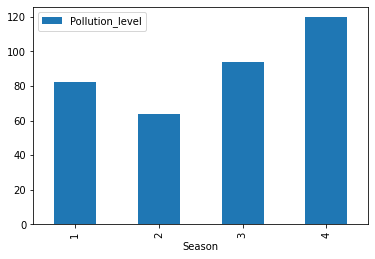

In [196]:
lat_year = df['year'].max()
last_2_year_df = df[df["year"] >= last_year - 1]
df8 = last_2_year_df[['season','PM_mean']]
season4 = df8[df8["season"] == 4]
season_four_mean = season4['PM_mean'].mean()
season3 = df8[df8["season"] == 3]
season_three_mean = season3['PM_mean'].mean() 
season2 = df8[df8["season"] == 2]
season_two_mean = season2['PM_mean'].mean()
season1 = df8[df8["season"] == 1]
season_one_mean = season1['PM_mean'].mean()

data = {'Pollution_level': [season_one_mean, season_two_mean, season_three_mean, season_four_mean], 'Season': [1, 2, 3, 4]} 
df9 = pd.DataFrame(data)
df9.plot.bar(x='Season', y='Pollution_level')

## 8. Коррелирует ли влажность с качеством воздуха?
Можно воспользоваться корреляцией Пирсона из numpy, а также встроенными функциями Pandas.

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['PM_mean'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

## 9. Какой из сезонов в Пекине самый дождливый(в среднем по накоплению осадков)?

<AxesSubplot:xlabel='Season'>

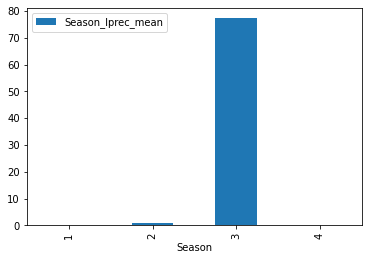

In [197]:
df5 = dfcopy[['season','Iprec']]
season4 = df5[df5["season"] == 4]
season4mean = season4['Iprec'].mean()
season3 = df5[df5["season"] == 3]
season3mean = season3['Iprec'].mean() 
season2 = df5[df5["season"] == 2]
season2mean = season2['Iprec'].mean()
season1 = df5[df5["season"] == 1]
season1mean = season1['Iprec'].mean()

data = {'Season_Iprec_mean': [season1mean, season2mean, season3mean, season4mean], 'Season': [1, 2, 3, 4]} 
df6 = pd.DataFrame(data)
df6.plot.bar(x='Season', y='Season_Iprec_mean')

## 10. Становится ли качество воздуха во время дождя лучше, чем оно было сразу перед дождем?

In [198]:
d = df['Iprec'].ne(0).idxmax()
if df.iloc[d]['Iprec'] <= df.iloc[d-1]['Iprec']:
    print(True)
else:
    print(False)
    

False
